In [38]:
library("dada2")
library("ShortRead")
fileDirc <- list('/mnt/storage/projects/k-seq/working/dada2/strict_21/R4A-inputA_S1.joined.filtered.fastq',
 '/mnt/storage/projects/k-seq/working/dada2/strict_21/RFA-1250A_S2.joined.filtered.fastq',
 '/mnt/storage/projects/k-seq/working/dada2/strict_21/R4A-250A_S3.joined.filtered.fastq')

In [43]:
reads <- readFastq('/mnt/storage/projects/k-seq/working/dada2/strict_21/R4A-inputA_S1.joined.filtered.fastq')

In [46]:
quality(reads)[1:2]

class: FastqQuality
quality:
  A BStringSet instance of length 2
    width seq
[1]    21 BBB?BBBBBBBBBBBBBBBBB
[2]    21 B;BBBBBBBBBB?BBBBBBBB

Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.


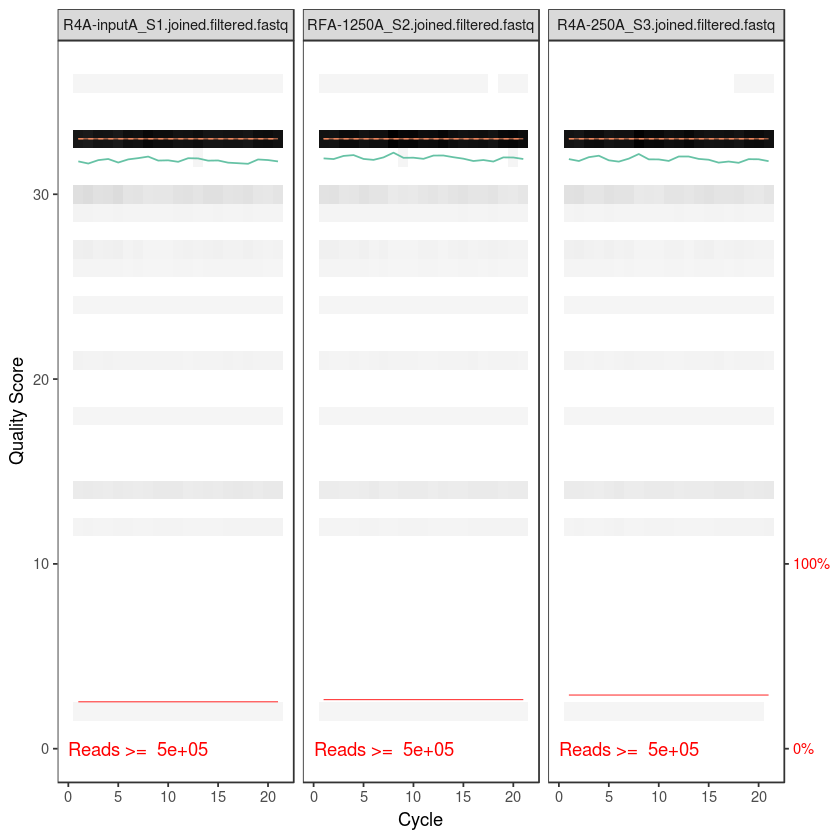

In [39]:
root <- '/mnt/storage/projects/k-seq/working/dada2'
plotQualityProfile(fileDirc[0:3])

In [34]:
help(plotQualityProfile)

[1] "list"

## test with default error reported from Phred

In [187]:
length(dircList)

[1] 28

In [356]:
dircList <- c(
 '/mnt/storage/projects/k-seq/working/dada2/strict_21/R4A-inputA_S1.joined.filtered.fastq',
 '/mnt/storage/projects/k-seq/working/dada2/strict_21/RFA-1250A_S2.joined.filtered.fastq',
 '/mnt/storage/projects/k-seq/working/dada2/strict_21/R4A-250A_S3.joined.filtered.fastq',
 '/mnt/storage/projects/k-seq/working/dada2/strict_21/R4A-50A_S4.joined.filtered.fastq',
 '/mnt/storage/projects/k-seq/working/dada2/strict_21/R4A-10A_S5.joined.filtered.fastq',
 '/mnt/storage/projects/k-seq/working/dada2/strict_21/R4A-2A_S6.joined.filtered.fastq',
 '/mnt/storage/projects/k-seq/working/dada2/strict_21/R4A-0A_S7.joined.filtered.fastq',
 '/mnt/storage/projects/k-seq/working/dada2/strict_21/R4A-inputB_S8.joined.filtered.fastq',
 '/mnt/storage/projects/k-seq/working/dada2/strict_21/RFA-1250B_S9.joined.filtered.fastq',
 '/mnt/storage/projects/k-seq/working/dada2/strict_21/R4A-250B_S10.joined.filtered.fastq',
 '/mnt/storage/projects/k-seq/working/dada2/strict_21/R4A-50B_S11.joined.filtered.fastq',
 '/mnt/storage/projects/k-seq/working/dada2/strict_21/R4A-10B_S12.joined.filtered.fastq',
 '/mnt/storage/projects/k-seq/working/dada2/strict_21/R4A-2B_S13.joined.filtered.fastq',
 '/mnt/storage/projects/k-seq/working/dada2/strict_21/R4A-0B_S14.joined.filtered.fastq',
 '/mnt/storage/projects/k-seq/working/dada2/strict_21/R4B-inputA_S15.joined.filtered.fastq',
 '/mnt/storage/projects/k-seq/working/dada2/strict_21/RFB-1250A_S16.joined.filtered.fastq',
 '/mnt/storage/projects/k-seq/working/dada2/strict_21/R4B-250A_S17.joined.filtered.fastq',
 '/mnt/storage/projects/k-seq/working/dada2/strict_21/R4B-50A_S18.joined.filtered.fastq',
 '/mnt/storage/projects/k-seq/working/dada2/strict_21/R4B-10A_S19.joined.filtered.fastq',
 '/mnt/storage/projects/k-seq/working/dada2/strict_21/R4B-2A_S20.joined.filtered.fastq',
 '/mnt/storage/projects/k-seq/working/dada2/strict_21/R4B-0A_S21.joined.filtered.fastq',
 '/mnt/storage/projects/k-seq/working/dada2/strict_21/R4B-inputB_S22.joined.filtered.fastq',
 '/mnt/storage/projects/k-seq/working/dada2/strict_21/RFB-1250B_S23.joined.filtered.fastq',
 '/mnt/storage/projects/k-seq/working/dada2/strict_21/R4B-250B_S24.joined.filtered.fastq',
 '/mnt/storage/projects/k-seq/working/dada2/strict_21/R4B-50B_S25.joined.filtered.fastq',
 '/mnt/storage/projects/k-seq/working/dada2/strict_21/R4B-10B_S26.joined.filtered.fastq',
 '/mnt/storage/projects/k-seq/working/dada2/strict_21/R4B-2B_S27.joined.filtered.fastq',
 '/mnt/storage/projects/k-seq/working/dada2/strict_21/R4B-0B_S28.joined.filtered.fastq')

dadaRes <- list()

for (i in 1:length(dircList)){
  # err <- learnErrors(dircList[i], multithread = TRUE)
   derep <- derepFastq(dircList[i], verbose = TRUE)
   denoised <- dada(derep, err = defaultErr, multithread = TRUE)
   currentRes = list(dirc=dircList[i], err=err, derep=derep, denoised=denoised) 
   dadaRes[[i]] <- currentRes
}

Dereplicating sequence entries in Fastq file: /mnt/storage/projects/k-seq/working/dada2/strict_21/R4A-inputA_S1.joined.filtered.fastq
.Encountered 312944 unique sequences from 1972625 total sequences read.


Sample 1 - 1972625 reads in 312944 unique sequences.


Dereplicating sequence entries in Fastq file: /mnt/storage/projects/k-seq/working/dada2/strict_21/RFA-1250A_S2.joined.filtered.fastq
.Encountered 26811 unique sequences from 1887026 total sequences read.


Sample 1 - 1887026 reads in 26811 unique sequences.


Dereplicating sequence entries in Fastq file: /mnt/storage/projects/k-seq/working/dada2/strict_21/R4A-250A_S3.joined.filtered.fastq
.Encountered 21701 unique sequences from 1721820 total sequences read.


Sample 1 - 1721820 reads in 21701 unique sequences.


Dereplicating sequence entries in Fastq file: /mnt/storage/projects/k-seq/working/dada2/strict_21/R4A-50A_S4.joined.filtered.fastq
..Encountered 40200 unique sequences from 2407377 total sequences read.


Sample 1 - 2407377 reads in 40200 unique sequences.


Dereplicating sequence entries in Fastq file: /mnt/storage/projects/k-seq/working/dada2/strict_21/R4A-10A_S5.joined.filtered.fastq
.Encountered 24080 unique sequences from 1392173 total sequences read.


Sample 1 - 1392173 reads in 24080 unique sequences.


Dereplicating sequence entries in Fastq file: /mnt/storage/projects/k-seq/working/dada2/strict_21/R4A-2A_S6.joined.filtered.fastq
.Encountered 21992 unique sequences from 1449941 total sequences read.


Sample 1 - 1449941 reads in 21992 unique sequences.


Dereplicating sequence entries in Fastq file: /mnt/storage/projects/k-seq/working/dada2/strict_21/R4A-0A_S7.joined.filtered.fastq
..Encountered 1348 unique sequences from 2782840 total sequences read.


Sample 1 - 2782840 reads in 1348 unique sequences.


Dereplicating sequence entries in Fastq file: /mnt/storage/projects/k-seq/working/dada2/strict_21/R4A-inputB_S8.joined.filtered.fastq
.Encountered 164497 unique sequences from 1163240 total sequences read.


Sample 1 - 1163240 reads in 164497 unique sequences.


Dereplicating sequence entries in Fastq file: /mnt/storage/projects/k-seq/working/dada2/strict_21/RFA-1250B_S9.joined.filtered.fastq
...Encountered 39007 unique sequences from 3261229 total sequences read.


Sample 1 - 3261229 reads in 39007 unique sequences.


Dereplicating sequence entries in Fastq file: /mnt/storage/projects/k-seq/working/dada2/strict_21/R4A-250B_S10.joined.filtered.fastq
.........Encountered 112119 unique sequences from 9651905 total sequences read.


Sample 1 - 9651905 reads in 112119 unique sequences.


Dereplicating sequence entries in Fastq file: /mnt/storage/projects/k-seq/working/dada2/strict_21/R4A-50B_S11.joined.filtered.fastq
..Encountered 52717 unique sequences from 2324796 total sequences read.


Sample 1 - 2324796 reads in 52717 unique sequences.


Dereplicating sequence entries in Fastq file: /mnt/storage/projects/k-seq/working/dada2/strict_21/R4A-10B_S12.joined.filtered.fastq
..Encountered 61434 unique sequences from 2182334 total sequences read.


Sample 1 - 2182334 reads in 61434 unique sequences.


Dereplicating sequence entries in Fastq file: /mnt/storage/projects/k-seq/working/dada2/strict_21/R4A-2B_S13.joined.filtered.fastq
.Encountered 38021 unique sequences from 1750328 total sequences read.


Sample 1 - 1750328 reads in 38021 unique sequences.


Dereplicating sequence entries in Fastq file: /mnt/storage/projects/k-seq/working/dada2/strict_21/R4A-0B_S14.joined.filtered.fastq
..Encountered 944 unique sequences from 2408620 total sequences read.


Sample 1 - 2408620 reads in 944 unique sequences.


Dereplicating sequence entries in Fastq file: /mnt/storage/projects/k-seq/working/dada2/strict_21/R4B-inputA_S15.joined.filtered.fastq
..Encountered 467838 unique sequences from 2325271 total sequences read.


Sample 1 - 2325271 reads in 467838 unique sequences.


Dereplicating sequence entries in Fastq file: /mnt/storage/projects/k-seq/working/dada2/strict_21/RFB-1250A_S16.joined.filtered.fastq
.Encountered 24909 unique sequences from 1510053 total sequences read.


Sample 1 - 1510053 reads in 24909 unique sequences.


Dereplicating sequence entries in Fastq file: /mnt/storage/projects/k-seq/working/dada2/strict_21/R4B-250A_S17.joined.filtered.fastq
..Encountered 40032 unique sequences from 2958593 total sequences read.


Sample 1 - 2958593 reads in 40032 unique sequences.


Dereplicating sequence entries in Fastq file: /mnt/storage/projects/k-seq/working/dada2/strict_21/R4B-50A_S18.joined.filtered.fastq
...Encountered 62801 unique sequences from 3322675 total sequences read.


Sample 1 - 3322675 reads in 62801 unique sequences.


Dereplicating sequence entries in Fastq file: /mnt/storage/projects/k-seq/working/dada2/strict_21/R4B-10A_S19.joined.filtered.fastq
...Encountered 62775 unique sequences from 3450131 total sequences read.


Sample 1 - 3450131 reads in 62775 unique sequences.


Dereplicating sequence entries in Fastq file: /mnt/storage/projects/k-seq/working/dada2/strict_21/R4B-2A_S20.joined.filtered.fastq
..Encountered 27540 unique sequences from 2335473 total sequences read.


Sample 1 - 2335473 reads in 27540 unique sequences.


Dereplicating sequence entries in Fastq file: /mnt/storage/projects/k-seq/working/dada2/strict_21/R4B-0A_S21.joined.filtered.fastq
.Encountered 664 unique sequences from 1855534 total sequences read.


Sample 1 - 1855534 reads in 664 unique sequences.


Dereplicating sequence entries in Fastq file: /mnt/storage/projects/k-seq/working/dada2/strict_21/R4B-inputB_S22.joined.filtered.fastq
..Encountered 472800 unique sequences from 2110243 total sequences read.


Sample 1 - 2110243 reads in 472800 unique sequences.


Dereplicating sequence entries in Fastq file: /mnt/storage/projects/k-seq/working/dada2/strict_21/RFB-1250B_S23.joined.filtered.fastq
..Encountered 43500 unique sequences from 2899869 total sequences read.


Sample 1 - 2899869 reads in 43500 unique sequences.


Dereplicating sequence entries in Fastq file: /mnt/storage/projects/k-seq/working/dada2/strict_21/R4B-250B_S24.joined.filtered.fastq
...Encountered 33990 unique sequences from 3010679 total sequences read.


Sample 1 - 3010679 reads in 33990 unique sequences.


Dereplicating sequence entries in Fastq file: /mnt/storage/projects/k-seq/working/dada2/strict_21/R4B-50B_S25.joined.filtered.fastq
..Encountered 50089 unique sequences from 2610268 total sequences read.


Sample 1 - 2610268 reads in 50089 unique sequences.


Dereplicating sequence entries in Fastq file: /mnt/storage/projects/k-seq/working/dada2/strict_21/R4B-10B_S26.joined.filtered.fastq
.Encountered 35597 unique sequences from 1908811 total sequences read.


Sample 1 - 1908811 reads in 35597 unique sequences.


Dereplicating sequence entries in Fastq file: /mnt/storage/projects/k-seq/working/dada2/strict_21/R4B-2B_S27.joined.filtered.fastq
..Encountered 38818 unique sequences from 2351197 total sequences read.


Sample 1 - 2351197 reads in 38818 unique sequences.


Dereplicating sequence entries in Fastq file: /mnt/storage/projects/k-seq/working/dada2/strict_21/R4B-0B_S28.joined.filtered.fastq
..Encountered 17521 unique sequences from 2078977 total sequences read.


Sample 1 - 2078977 reads in 17521 unique sequences.


In [419]:
dadaRes[[1]]$denoised$denoised[dadaRes[[1]]$denoised$map[match('AGCCCGCTTCAAACAATCGGT', names(dadaRes[[1]]$derep$unique))]]

CCGCTTCAAACAATCGGTTTG 
                33753

In [417]:

seqTest <- 'TCGCCCTTCAAACAATCGGTC'


ATTACCCTGGTCATCGAGTGA 
               189092

In [354]:
generate_defaultErr <- function(){
    defaultErr <- err$err_out
    for (i in 1:16){
        for (j in 0:40){
            p <- 10**(-j/10)
            if (i %in% c(1, 6, 11, 16)){
                defaultErr[i, j] <- 1-p
            } else{
                defaultErr[i, j] <- p/3
            }
        }
    }
    return(defaultErr)
}

,0,1,2,3,4,5,6,7,8,9,⋯,31,32,33,34,35,36,37,38,39,40
A2A,0.2056718,0.3690427,0.4988128,0.6018928,0.6837722,0.74881136,0.80047377,0.84151068,0.87410746,0.90000000,⋯,0.9993690427,0.9994988128,0.9996018928,0.9996837722,9.997488e-01,9.998005e-01,9.998415e-01,9.998741e-01,9.999000e-01,9.735231e-01
A2C,0.2647761,0.2103191,0.1670624,0.1327024,0.1054093,0.08372955,0.06650874,0.05282977,0.04196418,0.03333333,⋯,0.0002103191,0.0001670624,0.0001327024,0.0001054093,8.372955e-05,6.650874e-05,5.282977e-05,4.196418e-05,3.333333e-05,1.135704e-02
A2G,0.2647761,0.2103191,0.1670624,0.1327024,0.1054093,0.08372955,0.06650874,0.05282977,0.04196418,0.03333333,⋯,0.0002103191,0.0001670624,0.0001327024,0.0001054093,8.372955e-05,6.650874e-05,5.282977e-05,4.196418e-05,3.333333e-05,6.527682e-03
A2T,0.2647761,0.2103191,0.1670624,0.1327024,0.1054093,0.08372955,0.06650874,0.05282977,0.04196418,0.03333333,⋯,0.0002103191,0.0001670624,0.0001327024,0.0001054093,8.372955e-05,6.650874e-05,5.282977e-05,4.196418e-05,3.333333e-05,8.592137e-03
C2A,0.2647761,0.2103191,0.1670624,0.1327024,0.1054093,0.08372955,0.06650874,0.05282977,0.04196418,0.03333333,⋯,0.0002103191,0.0001670624,0.0001327024,0.0001054093,8.372955e-05,6.650874e-05,5.282977e-05,4.196418e-05,3.333333e-05,1.849465e-06
C2C,0.2056718,0.3690427,0.4988128,0.6018928,0.6837722,0.74881136,0.80047377,0.84151068,0.87410746,0.90000000,⋯,0.9993690427,0.9994988128,0.9996018928,0.9996837722,9.997488e-01,9.998005e-01,9.998415e-01,9.998741e-01,9.999000e-01,9.999482e-01
C2G,0.2647761,0.2103191,0.1670624,0.1327024,0.1054093,0.08372955,0.06650874,0.05282977,0.04196418,0.03333333,⋯,0.0002103191,0.0001670624,0.0001327024,0.0001054093,8.372955e-05,6.650874e-05,5.282977e-05,4.196418e-05,3.333333e-05,2.739484e-05
C2T,0.2647761,0.2103191,0.1670624,0.1327024,0.1054093,0.08372955,0.06650874,0.05282977,0.04196418,0.03333333,⋯,0.0002103191,0.0001670624,0.0001327024,0.0001054093,8.372955e-05,6.650874e-05,5.282977e-05,4.196418e-05,3.333333e-05,2.250876e-05
G2A,0.2647761,0.2103191,0.1670624,0.1327024,0.1054093,0.08372955,0.06650874,0.05282977,0.04196418,0.03333333,⋯,0.0002103191,0.0001670624,0.0001327024,0.0001054093,8.372955e-05,6.650874e-05,5.282977e-05,4.196418e-05,3.333333e-05,2.140814e-04
G2C,0.2647761,0.2103191,0.1670624,0.1327024,0.1054093,0.08372955,0.06650874,0.05282977,0.04196418,0.03333333,⋯,0.0002103191,0.0001670624,0.0001327024,0.0001054093,8.372955e-05,6.650874e-05,5.282977e-05,4.196418e-05,3.333333e-05,5.378984e-04


In [107]:
testSeqs <- c('TTCACCTAGGTCATCGAGTGT', 'CCGCTTCAAACAATCGGTTTG', 'CTGTTTCAAACAATCGGCCTG', 'CCAGTCTTCAAACAATCGGTC', 'TCGCCCTTCAAACAATCGGTC', 'AGCCCGCTTCAAACAATCGGT', 'TTCCTGCTTCAAGCAATCGGT')

In [123]:
is.element(testSeqs, denoised$clustering[['sequence']])

[1]  TRUE  TRUE  TRUE  TRUE FALSE FALSE FALSE

In [160]:
denoised$

[1] 22

In [167]:
dadaRes$denoised[dadaRes$map[match('TTCACCTAGGTCATCGAGTGT', names(derep$uniques))]]

CTACTTCAAACAATCGGTCTG 
               305709

In [302]:
colSums(err$trans)

0        1        2        3        4        5        6        7 
       0        0        6        0        0        0        0        0 
       8        9       10       11       12       13       14       15 
       0        0        0        0     2187       22    16107        0 
      16       17       18       19       20       21       22       23 
       0       18       64        6       78     3175      222      171 
      24       25       26       27       28       29       30       31 
     942      114     1539     8609     2797     8113    55594   993105 
      32       33       34       35       36       37       38       39 
27297970   689827        0        0        0        0        0        0 
      40 
       0